In [1]:
#Download neccessary dependencies to start analysis.
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
!conda install -c anaconda seaborn -y
import seaborn as sns

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
seaborn                   0.9.0                    py35_0    anaconda


In [17]:
# The code was removed by Watson Studio for sharing.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
#replace Yes and No to 1 and 0
for columns in df_data_1:
    dummies = df_data_1.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)

df_data_1.gender.replace(to_replace=['Female', 'Male'], value=[0, 1],inplace=True)
df_data_1.InternetService.replace(to_replace=['DSL', 'Fiber optic'], value=[1, 2],inplace=True)

In [19]:
df_data_1.replace(to_replace='No phone service', value=np.NaN, inplace=True)
df_data_1.replace(to_replace='No internet service', value=np.NaN, inplace=True)
df_data_1.dropna(axis=0, inplace=True)
df_data_1.reset_index(drop = True, inplace = True)
df_data_1.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines       float64
InternetService       int64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [20]:
df_data_1.drop(columns=['customerID','Contract','PaymentMethod','TotalCharges'],axis=1, inplace=True)
df_data_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn
0,1,0,0,0,34,1,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0,56.95,0
1,1,0,0,0,2,1,0.0,1,1.0,1.0,0.0,0.0,0.0,0.0,1,53.85,1
2,0,0,0,0,2,1,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1,70.70,1
3,0,0,0,0,8,1,1.0,2,0.0,0.0,1.0,0.0,1.0,1.0,1,99.65,1
4,1,0,0,1,22,1,1.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1,89.10,0


In [21]:
df_data_1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines       float64
InternetService       int64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
PaperlessBilling      int64
MonthlyCharges      float64
Churn                 int64
dtype: object

In [31]:
y = df_data_1.Churn
X = df_data_1.drop('Churn', axis=1)

In [38]:
#K Nearest Neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3868, 16) (3868,)
Test set: (967, 16) (967,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [185]:
k = 8
#Train Model and Predict  
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [186]:
yhat = KNN.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [187]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.790330920372
Test set Accuracy:  0.747673216132


In [188]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([ 0.70113754,  0.71975181,  0.71044467,  0.73009307,  0.72802482,
        0.74457084,  0.74560496,  0.74767322,  0.74250259])

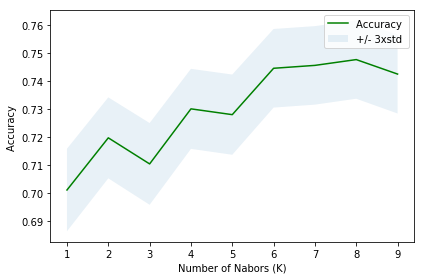

The best accuracy was with 0.747673216132 with k= 8


In [189]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [190]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT.fit(X_train,y_train)
DT

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [192]:
predTree = DT.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[1 0 0 0 0]
2109    0
2008    0
2616    0
3473    1
1454    1
Name: Churn, dtype: int64


In [194]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.748707342296


In [206]:
#Support Vector Machine
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [207]:
yhat = SVM_model.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0,

In [208]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [214]:
knn_yhat = KNN.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.75
KNN F1-score: 0.73


In [217]:
predTree = DT.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, predTree))
print("DT F1-score: %.2f" % f1_score(y_test, predTree, average='weighted') )

DT Jaccard index: 0.75
DT F1-score: 0.74


In [215]:
yhat = SVM_model.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

SVM Jaccard index: 0.76
SVM F1-score: 0.75


Results: Accuracy of the built model using different evaluation metrics

| Algorithm      | Jaccard      | F1-Score |
| ------------- |:-------------:| --------:|
| KNN           | 0.75          | 0.73     |
| SVM           | 0.76          | 0.75     |
| Decision Tree | 0.76          | 0.75     |